### Task 1

In [1]:
import numpy as np 
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
train_df = pd.read_csv('data/titanic/train.csv')
test_df = pd.read_csv('data/titanic/test.csv')

In [7]:
#Checking data types and missing values
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


From the above, we can tell columns Age, Cabin and Embarked are missing values since there are 891 rows/data instances. We can also see various object data types which means we may need to encode.

In [8]:
#Drop columns which may not be useful(Name, Ticket, Cabin)
drop_cols = ['Name', 'Ticket', 'Cabin', 'PassengerId']
train_df = train_df.drop(drop_cols, axis=1)
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


We know that Embarked is missing data so checking the value counts, we know that 'S' is the most common so we fill missing values using that.

In [22]:
print(train_df['Embarked'].value_counts())
train_df['Embarked'].fillna('S', inplace=True)

S    646
C    168
Q     77
Name: Embarked, dtype: int64


We map the categorical data types to numerical values for better classification

In [23]:
train_df['Sex'] = train_df['Sex'].map({'male':0, 'female':1})
train_df['Embarked'] = train_df['Embarked'].map({'C':0, 'Q':1, 'S':2})

In [24]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,2
1,1,1,1,38.0,1,0,71.2833,0
2,1,3,1,26.0,0,0,7.9250,2
3,1,1,1,35.0,1,0,53.1000,2
4,0,3,0,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,2
887,1,1,1,19.0,0,0,30.0000,2
888,0,3,1,NaN,1,2,23.4500,2
889,1,1,0,26.0,0,0,30.0000,0


Impute missing values for Age

In [27]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)

train_df['Age'] = imputer.fit_transform(pd.DataFrame(train_df['Age'])).round(decimals=0)

#Check if any NaN are left
train_df['Age'].isna().any()

False

In [28]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,2
1,1,1,1,38.0,1,0,71.2833,0
2,1,3,1,26.0,0,0,7.9250,2
3,1,1,1,35.0,1,0,53.1000,2
4,0,3,0,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,2
887,1,1,1,19.0,0,0,30.0000,2
888,0,3,1,30.0,1,2,23.4500,2
889,1,1,0,26.0,0,0,30.0000,0


### 2) Select a set of important features. Please show your selected features and explain how you perform feature selection.

Doing feature selection using SelectKBest: 
    ['Pclass', 'Sex', 'Age', 'Fare','Embarked']

In [35]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = train_df.drop('Survived', axis=1)
y = train_df['Survived']

fs = SelectKBest(chi2, k=5)
fs.fit(X,y)

ix = fs.get_support()
X.columns[ix]

Index(['Pclass', 'Sex', 'Age', 'Fare', 'Embarked'], dtype='object')

### 3) Learn a decision tree model with theTitanic training data using Gini index, plot your decision tree

In [40]:
from sklearn.tree import DecisionTreeClassifier
best_ftrs = ['Pclass', 'Sex', 'Age', 'Fare','Embarked']

#Separate day between X and y (was previously separated above)
X = X[best_ftrs]
y = y

#Train-test split is not needed because our datasets are already split
#Decision tree instance
dtc = DecisionTreeClassifier(criterion='gini',random_state=0)
dtc.fit(X,y)

DecisionTreeClassifier(random_state=0)

Plotting the decision tree 

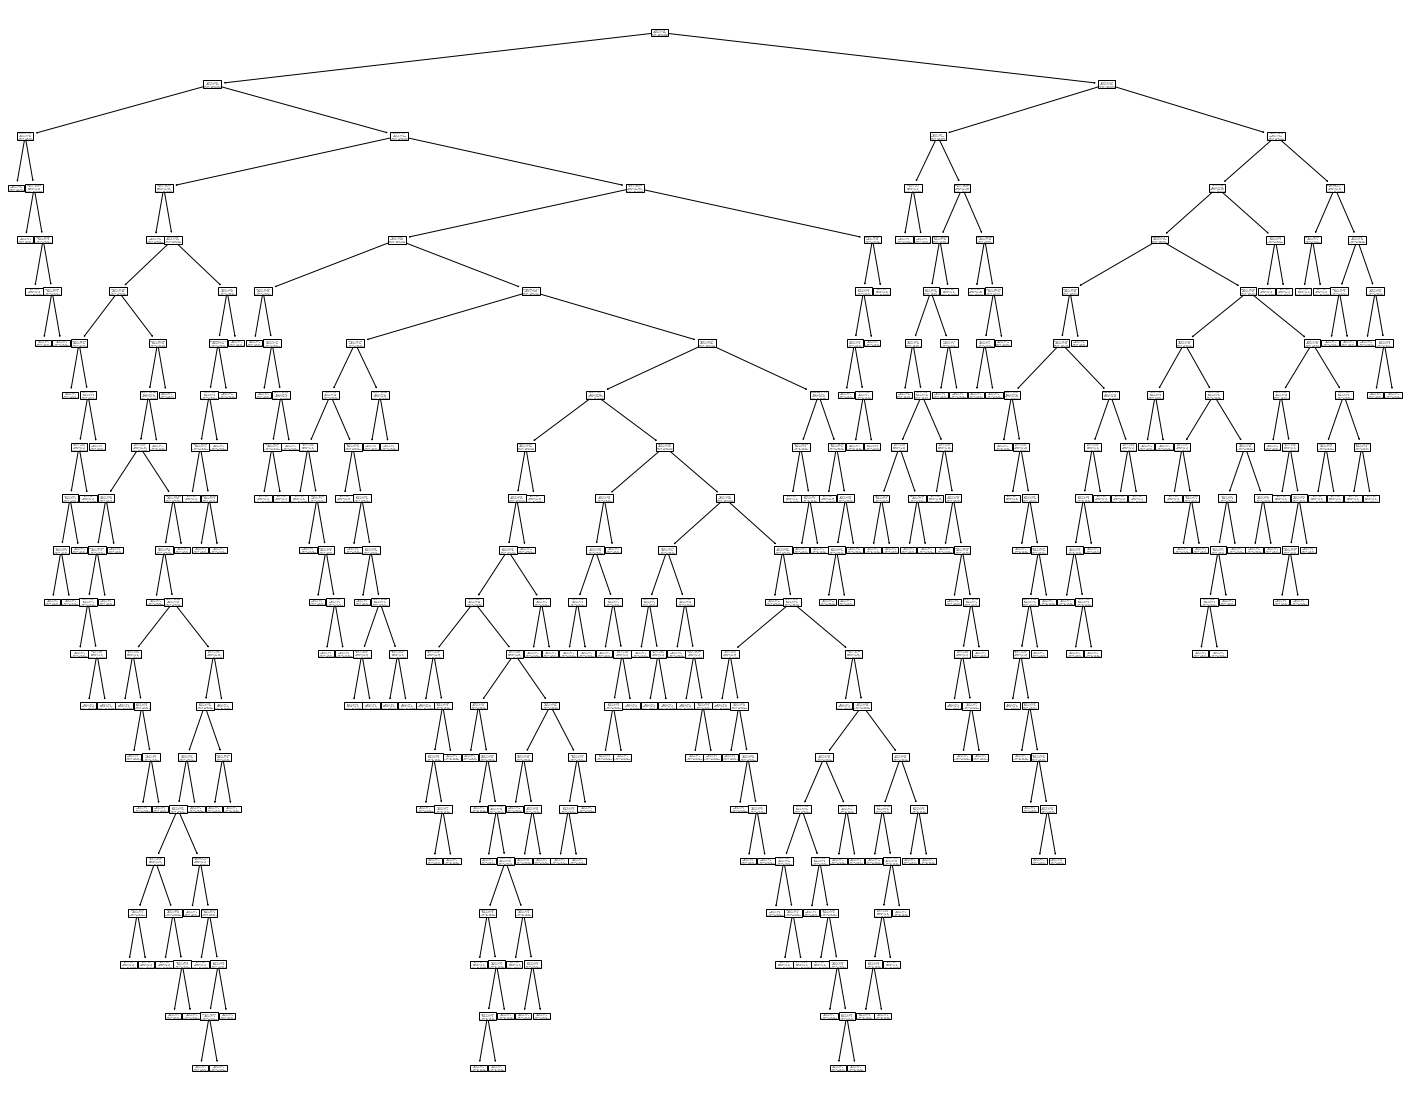

In [43]:
from sklearn import tree
fig = plt.figure(figsize=(25, 20))
_ = tree.plot_tree(dtc, feature_names=X.columns, class_names={0:'No Survive', 1:'Survived'})

### 4) Applying the five-fold cross validation of the decision tree learning algorithm to the Titanic training data to extract average classification accuracy

In [46]:
from sklearn.model_selection import KFold, cross_val_score

kf = KFold(n_splits=5, random_state=42, shuffle=True)
dtc_acc_scores = cross_val_score(dtc, X, y, cv=kf, scoring='accuracy')
print(f'Average accuracy: {dtc_acc_scores.mean()}')

Average accuracy: 0.7856506182913817


### 5) Apply the five-fold cross validation of the random forest learning algorithm to the Titanic training data to extract average classification accuracy

In [47]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion='gini', random_state=0)
rf_acc_scores = cross_val_score(rfc, X, y, cv=kf, scoring='accuracy')
print(f'Average accuracy: {rf_acc_scores.mean()}')

Average accuracy: 0.815956311593748


### 6) Which algorithm is better, Decision Tree or Random Forest? 
The Random Forest algorithm is better because it is an ensemble of Decision Trees


### 7) What are your observations and conclusions from the algorithm comparison and analysis?

It seems as the RandomForestClassifier algorithm is better because it uses various decision trees to catch small nuances in the data and give a more accurate score.